<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Area Between Curves and Wealth Distribution

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad

In [2]:
#define y = x


In [3]:
#define y = sqrt(x)


In [4]:
#plot on 0, 1


In [5]:
#area between?


**EX:** Consider $y = \sqrt{x}$ and $y = x^2$

In [6]:
#define functions


In [7]:
#plot


In [8]:
#domain?


In [9]:
#solution


1. $f(x) = \sin{x}$ and $g(x) = \cos{x}$ on $[0, \pi]$
2. Between $f(x) = 3x + 4$ and $g(x) = x^2$

# Wealth Distribution

One way that we might understand equality is through understanding the distribution of wealth in a society.  Perfect wealth distribution would mean that all participants have the same share of wealth as everyone else.  We can represent this situation mathematically with a function $L(x) = x$ that we will call the **Lorenz Curve**. 

Concretely, if we were to look at every 20% of the population, we would see 20% of income.

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 20 |
| Lowest two - Fifths | 40 |
| Lowest three - Fifths | 60 |
| Lowest four - Fifths | 80 |
| Lowest five - Fifths | 100 |



In [2]:
percent = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
lorenz = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

Text(0.5,1,'Perfect Wealth Distribution')

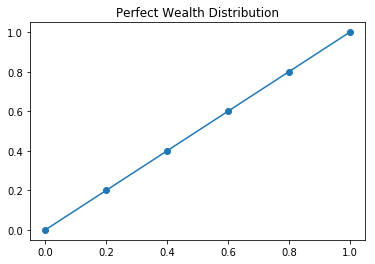

In [3]:
plt.plot(percent, lorenz, '-o')
plt.title("Perfect Wealth Distribution")

It is unlikely that we have perfect distribution of wealth in a society however.  For example, the following table describes the cumulative distribution of income in the United States for the year 1994.  

| Fifths of Households | Percent of Wealth |
| -------------------  | -------------     |
| Lowest Fifth | 4.2 |
| Lowest two - Fifths | 14.2 |
| Lowest three - Fifths | 29.9 |
| Lowest four - Fifths | 53.2 |
| Lowest five - Fifths | 100.0 |

In [4]:
usa_94 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

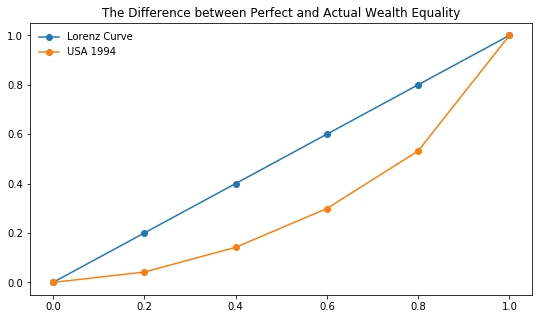

In [5]:
plt.figure(figsize = (9, 5))
plt.plot(percent, lorenz, '-o', label = 'Lorenz Curve')
plt.plot(percent, usa_94, '-o', label = 'USA 1994')
plt.title("The Difference between Perfect and Actual Wealth Equality")
plt.legend(loc = 'best', frameon = False)

The area between these curves can be understood to represent the discrepency between perfect wealth distribution and levels of inequality.  Further, if we examine the ratio between this area and that under the **Lorenz Curve** we get the **Gini Index**.  

One big issue remains however.  We don't want to use rectangles to approximate these regions but we don't have equations for the actual distribution of wealth.  We introduce two curve fitting techniques using `numpy` to address this problem.

## Quadratic Fit

The curve in the figure above representing the actual distribution of wealth in the USA in 1994 can be approximated by a polynomial function.  NumPy has a function called `polyfit` that will fit a polynomial to a set of points.  Here, we use `polyfit` to fit a quadratic function to the points.

### Getting the Fit

Below, we return to the complete picture where we plot our fitted function and the **Lorenz Curve** and shade the area that represents the difference in income distribution.

Now, we want to compute the ratio between the area between the curves to that under the **Lorenz Curve**.  We can do this easily using our `quad` function for estimating integrals.

### Inequality through Time

Now that we understand how to compute the Gini Index, we want to explore what improving the gap in wealth distribution would mean.  

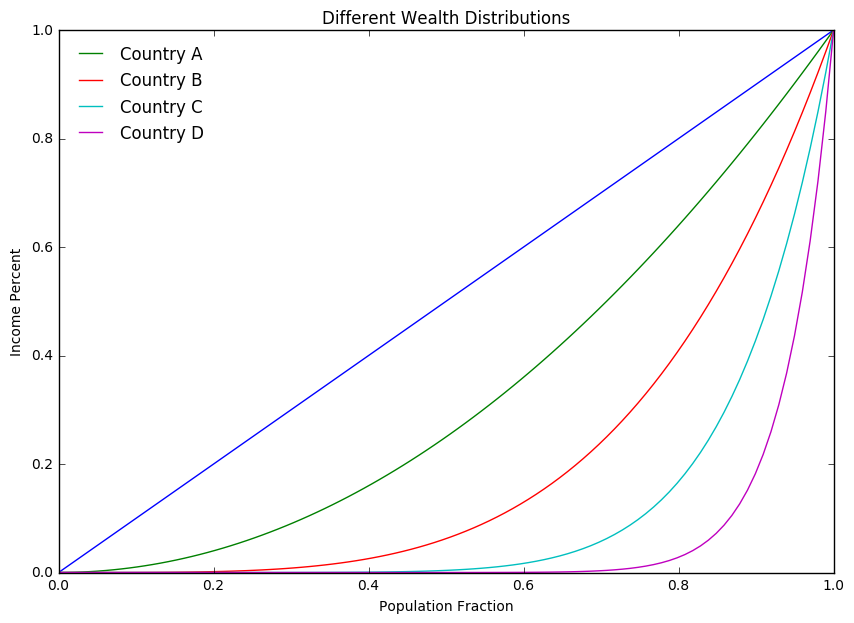

In [14]:
x = np.linspace(0, 1, 100)
plt.figure(figsize = (10, 7))
plt.plot(x, x)
plt.plot(x, x**2, label = "Country A")
plt.plot(x, x**4, label = "Country B")
plt.plot(x, x**8, label = "Country C")
plt.plot(x, x**16, label = "Country D")
plt.ylabel("Income Percent")
plt.xlabel("Population Fraction")
plt.title("Different Wealth Distributions")
plt.legend(loc = "best", frameon = False)

Which of the above countries do you believe is the most equitable?  Why?



### Census Bureau Data and Pandas

There are many organizations that use the Gini Index to this day.  The OECD, World Bank, and US Census all track Gini Indicies.  We want to investigate the real data much as we have with our smaller examples.  To do so, we will use the Pandas library.  

The table below gives distribution data for the years 1970, 1980, 1990, and 2000.  

| x | 0.0 | 0.2 | 0.4 | 0.6 | 0.8 | 1.0 |
| --- | --- | --- | --- | --- | --- | --- |
| 1970 | 0.000 | 0.041 | 0.149 | 0.323 | 0.568 | 1.000 |
| 1980 | 0.000 | 0.042 | 0.144 | 0.312 | 0.559 | 1.000 |
| 1990 | 0.000 | 0.038 | 0.134 | 0.293 | 0.530 | 1.000 |
| 2000 | 0.000 | 0.036 | 0.125 | 0.273 | 0.503 | 1.000 |

#### Creating the DataFrame

We will begin by creating a table from this data by entering lists with these values and creating a DataFrame from these lists.  



In [15]:
import pandas as pd
seventies = [0, 0.041, 0.149, 0.323, 0.568, 1.0]
eighties = [0, 0.042, 0.144, 0.312, 0.559, 1.0]
nineties = [0, 0.038, 0.134, 0.293, 0.53, 1.0]
twothou = [0, 0.036, 0.125, 0.273, 0.503, 1.0]

In [16]:
df = pd.DataFrame({'1970s': seventies, '1980s':eighties, '1990s': nineties,
                  '2000s': twothou, 'perfect': [0, 0.2, 0.4, 0.6, 0.8, 1.0]})
df.head()

,1970s,1980s,1990s,2000s,perfect
0,0.000,0.000,0.000,0.000,0.0
1,0.041,0.042,0.038,0.036,0.2
2,0.149,0.144,0.134,0.125,0.4
3,0.323,0.312,0.293,0.273,0.6
4,0.568,0.559,0.530,0.503,0.8


### Problems





**Problem 1**: Consider $y = x$ and $y = x^2$.  What is the Gini Coefficient between these curves?


**Problem 2**: Use the table below to find the Lorenz curve for the data.

| Fraction of People | Fraction of Income |
| ----------------   | ------------------ |
| 0.0 | 0.0 |
| 0.2 | 0.06 |
| 0.4 | 0.18 |
| 0.6 | 0.36 |
| 0.8 | 0.60 |
| 1.0 | 1.00 |

**Problem 3**: Let the fraction of population be the variable $p$ and the fraction of the resource to be $r$.  Use the symbols to write the equation for perfect equality.


**Problem 4**: The table below shows how arable land is distributed among farmers in Blivia, Denmark, and the United States.  In which country is the land most equally distributed?  The least?

| Fraction of Farmers | Fraction of Land Bolivia | Denmark | United States |
| -----------------   | -----------------------  | -------- | ------------ |
| 0.0 | 0.0 | 0.0 | 0.0 |
| 0.1 | 0.0 | 0.06 | 0.025 |
| 0.2 | 0.0 | 0.12 | 0.05 |
| 0.3 | 0.0 | 0.18 | 0.075 |
| 0.4 | 0.0 | 0.24 | 0.10 | 
| 0.5 | 0.010 | 0.30 | 0.13 |
| 0.6 | 0.016 | 0.36 | 0.18 |
| 0.7 | 0.022 | 0.45 | 0.22 |
| 0.8 | 0.03 | 0.54 | 0.28 |
| 0.9 | 0.04 | 0.70 | 0.42 |
| 1.0 | 1.00 | 1.00 | 1.00 |

**Problem 5**: The table below shows how population was divided among the 25 largest countries in 1963 and 1968.  Was there change in the population distribution between 1963 and 1968? How would the Lorenz curves for 1963 and 1968 compare? 

| Fraction of Countries | Fraction of Population 1963 | 1968 |
| --------------------  | --------------------------  | ----- |
| 0.0 | 0.0 | 0.0 |
| 0.2 | 0.046 | 0.048 |
| 0.4 | 0.105 | 0.107 |
| 0.6 | 0.193 | 0.194 |
| 0.8 | 0.345 | 0.347 |
| 1.0 | 1.000 | 1.00  |

**Problem 6**: The table below shows how total energy produced and total energy consumed was divided among the 25 largest producers and users of energy in 1963.  Draw the corresponding Lornez curves on the same set of coordinates.  Was production of energy more or less equally divided than was use of energy?

| Fraction of Countries | Energy Used | Energy Produced |
| --------------------- | ----------  | --------------- |
| 0.0  | 0.00 | 0.00 |
| 0.2 | 0.027 | 0.032 |
| 0.4 | 0.065 | 0.084 | 
| 0.6 | 0.135 | 170 |
| 0.8 | 0.266 | 0.3031 |
| 1.0 | 1.000 | 1.0000 |

**Problem 7**: Letting $p$ stand for the fraction of the population and $r$ for the fraction of the resource, consider the family of Lorenz curve given by the equation 

$$r = p^n; \quad n = 1,2,3,4,...$$

- To what situation does $n = 1$ correspond?

- In what way is the number $n$ a measure of the equlaity of distribution?

- To what situation does the Lorenz curve $r = p^n$ correspond in the case as $n \to \infty$

**Problem 8**: The table below shows how gross national product (GNP) is distributed among the countries of the world:

| Fraction of Countries | Fraction of GNP |
| --------------------- | --------------- |
| 0.0 | 0.0 |
| 0.1 | 0.001 | 
| 0.2 | 0.002 | 
| 0.3 | 0.005 | 
| 0.4 | 0.010 |
| 0.5 | 0.018 | 
| 0.6 | 0.028 | 
| 0.7 | 0.058 |
| 0.8 | 0.11 |
| 0.9 | 0.21 |
| 1.0 | 1.00 |

a. Determine the Lorenz Curve for this data using the model you deem most appropriate.

b. Draw the Lorenz Curve and the curve for completely unequal distribution on the same axes.

c. Is the GNP divided equally or unequally among the countries of the world?  

**Problem 9**: Use the library to find a research article that investigates the Gini Coefficient.  Describe the research, what were they investigating, what was the data, and what did they find.  

**Problem 10**: The US Census provides data that could be used in an analysis of distribution of resources.  One such dataset is the [Wealth, Asset Ownership, & Debt of Households](https://www.census.gov/data/tables/2017/demo/wealth/wealth-asset-ownership.html). Use this data to analyze the equality of the distribution of debt -- or find another data table that is of interest and makes sense to use in an analysis of distribution of resources.